# **Opción 1: Graficador de casos del COVID-19**

*Analisis y visualización de datos sobre los casos de coronavirus en distintos paises*

<img width="450" height="300" src="https://cdn.pixabay.com/photo/2020/02/04/16/53/hand-washing-4818792_960_720.jpg">

En esta era de la desinformación puede resultar útil poder sacar uno mismo sus propias conclusiones acerca de los datos presentados. El objetivo de este trabajo es obtener datos de casos y muertes por el Coronavirus de un repositorio de datos online y graficar por país.

* La aplicación debe recibir del usuario el nombre del país deseado y graficar casos detectados y fallecimientos totales para ese país en función del tiempo.
* Pedir al usuario ingresar dos paises y gráficar para dichos países la cantidad de casos y fallecimientos en dos gráfico con etiquetas, el usuario debe ingresar el intervalo de tiempo a graficar. Calcular las intersecciónes entre graficos si las hubiera y marcarlas con un punto.
* Pedir al usuario ingresar *n* países y gráficar para dichos países la cantidad de casos en una [escala logaritmica](https://es.wikipedia.org/wiki/Escala_logar%C3%ADtmica). El programa debe pedirle al usuario el intervalo de tiempo
**Sugerencia:** 
*   Se pueden rotar las leyendas usando `plt.xticks(rotation=60)` (rotación de 60 grados). Es útil para leyendas largas, como por ejemplo, fechas.  
*   En esta [página web](https://nexiandigitalacademy.es/visualizacion-y-procesamiento-de-datos-ante-de-la-pandemia-del-covid-19/) hay un ejemplo de gráficos logaritmicos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime

In [3]:
df = pd.read_csv("full_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15201 entries, 0 to 15200
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          15201 non-null  object
 1   location      15201 non-null  object
 2   new_cases     15201 non-null  int64 
 3   new_deaths    15201 non-null  int64 
 4   total_cases   15201 non-null  int64 
 5   total_deaths  15201 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 712.7+ KB


La aplicación debe recibir del usuario
el nombre del país deseado y graficar casos detectados y fallecimientos totales para ese país en función del tiempo.

In [19]:
def handleNameInput(stringInput):
    lsInput = list(stringInput)
    lsInput[0] = lsInput[0].upper()
    for i in range(1, len(lsInput)):
        lsInput[i].lower()
    return ''.join(lsInput)

Enter a country: argentina


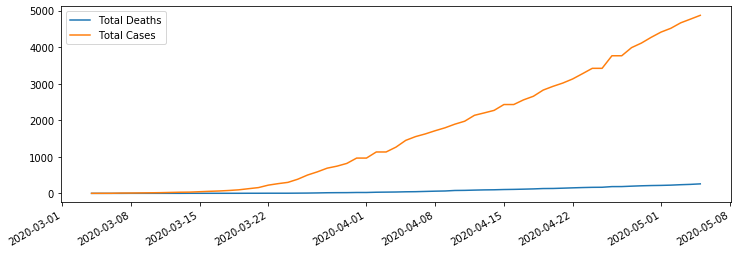

In [32]:
country = handleNameInput(input("Enter a country: "))
fig, axes = plt.subplots(figsize=(12,4))

datelist = df[df['location'] == country]['date'].tolist()
for i in range (0,len(datelist)):
    datelist[i] = datetime.datetime.strptime(datelist[i], '%m/%d/%Y').date()
    
myList = list(set(datelist))
myList.sort()
x_axis = np.array(myList)

axes.plot(x_axis,df[df['location'] == country]['total_deaths'], label = 'Total Deaths')
axes.plot(x_axis,df[df['location'] == country]['total_cases'], label = 'Total Cases')

fig.autofmt_xdate()
#axes.set_xticks(axes.get_xticks()[::int(len(axes.get_xticks())/10)])
axes.legend(loc = 0)
plt.show()

Pedir al usuario ingresar dos paises y gráficar para dichos países la cantidad de casos y fallecimientos en dos gráfico con etiquetas, el usuario debe ingresar el intervalo de tiempo a graficar. Calcular las intersecciónes entre graficos si las hubiera y marcarlas con un punto.

Enter the first country: china
Enter the second country: italy
Enter a day for the lower limit 5
Enter a month for the lower limit 2
Enter a day for the upper limit 4
Enter a month for the upper limit 5


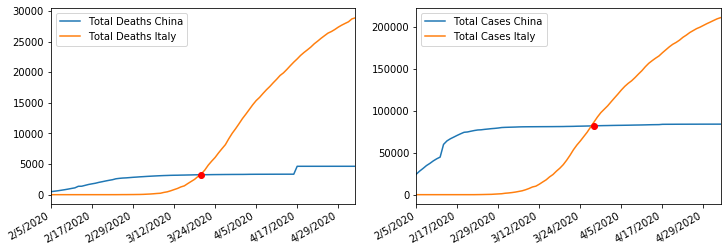

In [26]:
country1 = handleNameInput(input("Enter the first country: "))
country2 = handleNameInput(input("Enter the second country: "))
diaMin = input("Enter a day for the lower limit ")
mesMin = input("Enter a month for the lower limit ")
diaMax = input("Enter a day for the upper limit ")
mesMax = input("Enter a month for the upper limit ")

fechaMin = mesMin + "/" + diaMin + "/" + "2020"
fechaMax = mesMax + "/" + diaMax + "/" + "2020"

totalDeaths = 'total_deaths'
totalCases = 'total_cases'

graphs = [totalDeaths,totalCases]

fig, axes = plt.subplots(1,2, figsize = (12,4))

axes[0].plot(df[df['location'] == country1]['date'],df[df['location'] == country1][totalDeaths], label = 'Total Deaths ' + country1)
axes[0].plot(df[df['location'] == country2]['date'],df[df['location'] == country2][totalDeaths], label = 'Total Deaths ' + country2)

axes[1].plot(df[df['location'] == country1]['date'],df[df['location'] == country1][totalCases], label = 'Total Cases ' + country1)
axes[1].plot(df[df['location'] == country2]['date'],df[df['location'] == country2][totalCases], label = 'Total Cases ' + country2)

for x in range(0, len(graphs)):
    c1Tc = df[df['location'] == country1][graphs[x]]
    c2Tc = df[df['location'] == country2][graphs[x]]
    dLs = df[df['location'] == country1]['date']

    c1Tclist = c1Tc.tolist()
    c2Tclist = c2Tc.tolist()
    dLslist = dLs.tolist()

    length = 0

    if(len(c1Tclist) < len(c2Tclist)):
        length = len(c1Tclist)
    else:
        length = len(c2Tclist)

    for i in range (1,length):
        if ((c1Tclist[i] > c2Tclist[i]) and ( c1Tclist[i - 1] < c2Tclist[i - 1])) or ((c1Tclist[i] < c2Tclist[i]) and (c1Tclist[i - 1] > c2Tclist[i - 1])):
            axes[x].plot(dLslist[i],c1Tclist[i],'ro')

fig.autofmt_xdate()
for ax in axes:
    ax.set_xticks(ax.get_xticks()[::int(len(ax.get_xticks())/10)])
    ax.legend(loc = 0)
    ax.set_xlim([fechaMin, fechaMax])
    
    
plt.show()

* Pedir al usuario ingresar *n* países y gráficar para dichos países la cantidad de casos en una [escala logaritmica](https://es.wikipedia.org/wiki/Escala_logar%C3%ADtmica). El programa debe pedirle al usuario el intervalo de tiempo

Enter a day for the lower limit 5
Enter a month for the lower limit 2
Enter a day for the upper limit 30
Enter a month for the upper limit4
Enter a country china
Do you want to enter more countries? Press n to plot, Press enter to enter another country 
Enter a country italy
Do you want to enter more countries? Press n to plot, Press enter to enter another country 
Enter a country spain
Do you want to enter more countries? Press n to plot, Press enter to enter another country n


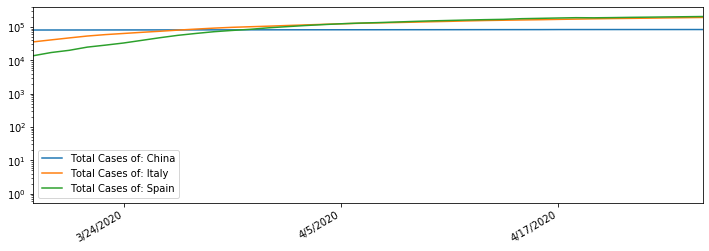

In [25]:
countries = []
answer = 'y'
fig, axes = plt.subplots(figsize = (12,4),sharex=True)
diaMin = input("Enter a day for the lower limit ")
mesMin = input("Enter a month for the lower limit ")
diaMax = input("Enter a day for the upper limit ")
mesMax = input("Enter a month for the upper limit")
while answer != 'n':
    countryEntered = handleNameInput(input("Enter a country "))
    countries.append(countryEntered)              
    answer = input("Do you want to enter more countries? Press n to plot, Press enter to enter another country ")
    
for i in countries:
    axes.plot(df[df['location'] == i]['date'],df[df['location'] == i]['total_cases'], label = 'Total Cases of: ' + i)
        
fig.autofmt_xdate()
axes.set_yscale('log',nonposy='clip')
axes.set_xticks(axes.get_xticks()[::int(len(axes.get_xticks())/10)])
axes.legend(loc = 0)
axes.set_xlim([fechaMin, fechaMax])
plt.show()